<a href="https://colab.research.google.com/github/ounospanas/AIDL_A_02/blob/main/notebooks/AIDL_A02_network_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


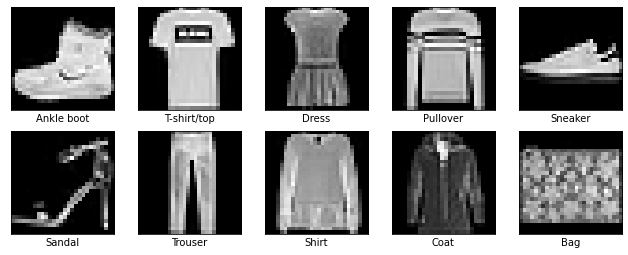

In [3]:
#visualize some data
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
selected = [0,1,3,5,6,8,16,18,19,23]
plt.figure(figsize=(11, 11))
for i, s in enumerate(selected):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #img = plt.imread(x_train[s])
    plt.imshow(x_train[s], cmap='gray')
    plt.xlabel(classes[y_train[s]],)

In [4]:
# normalize data
x_train = x_train.reshape(x_train.shape[0],-1)/255
x_test = x_test.reshape(x_test.shape[0],-1)/255

# Binary Classification

In [5]:
# select only t-shirts and ankle boots
shirt_train = np.where(y_train==0)
dress_train = np.where(y_train==3)

shirt_test = np.where(y_test==0)
dress_test = np.where(y_test==3)

In [6]:
# concatenate them
x_train_s = x_train[shirt_train]
y_train_s = y_train[shirt_train]

x_test_s = x_test[shirt_test]
y_test_s = y_test[shirt_test]

x_train_d = x_train[dress_train]
y_train_d = y_train[dress_train]

x_test_d = x_test[dress_test]
y_test_d = y_test[dress_test]

x_train_binary = np.concatenate([x_train_s, x_train_d])
x_test_binary = np.concatenate([x_test_s, x_test_d])

y_train_binary = np.concatenate([y_train_s, np.ones_like(y_train_d)])
y_test_binary = np.concatenate([y_test_s, np.ones_like(y_test_d)])

# Neural Network (Custom)

Compute the sigmoid function:
$$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$

In [7]:
def sigmoid(z):
    """
    Compute sigmoid function.
    z : the product theta.T * x + b
    Returns
    -------
    g : The sigmoid function.
    """
    a = 1./(1+np.exp(-z))

    return a

$a = ReLU(z) = max(z,0)$

In [8]:
def relu(z):
    """
    Compute relu function.
    z : the product theta.T * x + b
    Returns
    -------
    a : The relu function.
    """
    a = np.maximum(z,0)

    return a

In [9]:
# check relu function
assert relu(-1) == 0
assert relu(2) == 2

# Parameter Initialization

Xavier initialization: $$[-\sqrt{\frac{6}{n_{in}+n_{out}}}, \sqrt{\frac{6}{n_{in}+n_{out}}}]$$

In [ ]:
def init_params_xavier(n_in, n_out):
    
    # TO DO
    # set random seed to 0
    # Hint, check formula and use np.random.uniform
    np....
    w = None
    #########
    b = np.random.randn(n_out)*0.01
    return w, b

In [ ]:
# check init params
w, b  = init_params_xavier(2,3)
print(np.round(w,4) == np.array([[ 0.1069,  0.4715,  0.2251],[ 0.0983, -0.1673,  0.3196]]))
print(np.round(b,4) == np.array([0.0095, -0.0015, -0.001]))

[[ True  True  True]
 [ True  True  True]]
[ True  True  True]


He initialization: $$np.random.randn(n_{in}, n_{out})*\sqrt{\frac{2}{n_{in}}}$$, not multiply using 0.01.

In [ ]:
def init_params_he(n_in, n_out):
    # TO DO
    # set random seed to 0
    # Hint, check formula and use np.random.randn 
    # for b there is no n_in inside the np.random.randn 
    np...
    w = None
    b = None
    return w, b

In [ ]:
# check init params
w, b  = init_params_he(2,3)
print(np.round(w,4) == np.array([[ 1.7641,  0.4002,  0.9787], [ 2.2409,  1.8676, -0.9773]]))
print(np.round(b,4) == np.array([0.9501, -0.1514, -0.1032]))

[[ True  True  True]
 [ True  True  True]]
[ True  True  True]


Calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

In [ ]:
def costFunction(y, m, a):
    """
    Computes cost for linear regression. 
    X : feature vector, shape (m x n+1)
    y : labels (i.e., dog or cat), shape (m, )
    w : parameters for the linear regression, shape (n+1, )
    m: data legth

    returns
    -------
    J : value of cost function.
    """

    J = -1/m * np.sum(y*np.log(a) + (1-y)*np.log(1-a))
    
  
    return J

In [ ]:
#forward pass
def forward(X, w, b, activation = 'relu'):
    z = np.dot(X,w) + b
    if activation=='relu':
        a = relu(z)
    else:
        a = sigmoid(z)
    return a

In [ ]:
w, b  = init_params_he(2,3)
forward(np.asarray([[1,2],[3,4]]), w, b, 'relu')[0].shape

(3,)

\begin{split}ReLU'(z)= \begin{Bmatrix}1 & z>0 \\ 
0 & z<0 \end{Bmatrix}\end{split}

In [ ]:
#relu gradient
def reluBackward(z):
    z[z<=0] = 0
    z[z>0] = 1
    return z

Calculate the derivatives: $$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (A^{(i)}-Y^{(i)})$$

In [ ]:
#backpropagation
def backward(a, dz):
    m = len(a)
    dw = np.dot(a.T, dz) / m
    db = np.sum(dz, axis=0, keepdims=True) / m
    
    return dw, db

$$ w_j := w_j - \alpha dw_j $$
$$ b := b - \alpha db $$

In [ ]:
# update parameters for optimization
def update(w, b, dw, db, learning_rate=0.01):
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w, b

In [ ]:
#forward pass
def dummy_neural(X, y, n_layer_1, lr = 0.01, epochs = 100):
    parameters = {}
    gradients = {}
    costs = []

    n_in = X.shape[1]
    n_out = 1

    # initialize network with 1 hidden layer (and 1 output of course). 
    # Layer 1 should have 200 neurons
    w1, b1 = None #use init_params_xavier
    w2, b2 = None #use init_params_xavier

    parameters['w1'] = w1
    parameters['b1'] = b1
    parameters['w2'] = w2
    parameters['b2'] = b2

    for i in range(epochs):

        #forward pass
        a1 = forward(X, w1, b1, activation = 'relu')
        a2 = forward(a1, w2, b2, activation = 'sigmoid')
        
        #cost function
        cost = costFunction(y, len(y), a2)
        costs.append(cost)

        #backward pass
        dz2 = a2-y
        dw2, db2 = backward(a2, dz2)
        dz1 = np.dot((dz2),w2.T)*reluBackward(np.dot(X,w1) + b1)
        dw1, db1 = backward(X, dz1)

        gradients['dw1'] = dw1
        gradients['db1'] = db1
        gradients['dw2'] = dw2
        gradients['db2'] = db2

        #update weights
        w2, b2 = update(w2, b2, dw2, db2, lr)
        w1, b1 = update(w1, b1, dw1, db1, lr)

        parameters['w1'] = w1
        parameters['b1'] = b1
        parameters['w2'] = w2
        parameters['b2'] = b2
        
        if i%10==0:
            
            a1t = forward(x_test_binary, w1, b1, activation = 'relu')
            a2t = forward(a1t, w2, b2, activation = 'sigmoid')

            print("epoch {} with cost {}".format(i,cost))
            print("train:", np.mean(np.round(a2)==y))
            print("test:", np.mean(np.round(a2t.reshape(-1))==y_test_binary))

    return parameters, a2, costs, gradients

In [ ]:
learning_rate = 0.1
a = dummy_neural(x_train_binary, y_train_binary.reshape(-1,1), 200, learning_rate, 1000)

epoch 0 with cost 0.73222077432145
train: 0.5068333333333334
test: 0.5
epoch 10 with cost 0.3449637483262826
train: 0.8908333333333334
test: 0.882
epoch 20 with cost 0.2831690845443682
train: 0.897
test: 0.894
epoch 30 with cost 0.2593395198965416
train: 0.9028333333333334
test: 0.9015
epoch 40 with cost 0.2452727337640431
train: 0.9095833333333333
test: 0.907
epoch 50 with cost 0.23537812157188362
train: 0.9139166666666667
test: 0.913
epoch 60 with cost 0.22785751996816328
train: 0.9176666666666666
test: 0.917
epoch 70 with cost 0.22213162272876213
train: 0.9193333333333333
test: 0.921
epoch 80 with cost 0.2175448627414139
train: 0.9216666666666666
test: 0.9225
epoch 90 with cost 0.2136466884836102
train: 0.9239166666666667
test: 0.9235
epoch 100 with cost 0.21042192808580462
train: 0.9250833333333334
test: 0.924
epoch 110 with cost 0.20771532431056403
train: 0.927
test: 0.9255
epoch 120 with cost 0.20538208768692795
train: 0.928
test: 0.9275
epoch 130 with cost 0.20328904868104014
tr

In [ ]:
# check the test accuracy
a1t = forward(x_test_binary, a[0]['w1'], a[0]['b1'], activation = 'relu')
a2t = forward(a1t, a[0]['w2'], a[0]['b2'], activation = 'sigmoid')
# if you used he
# assert np.mean(np.round(a2t.reshape(-1))==y_test_binary) == 0.9255
# if you used xavier
assert np.mean(np.round(a2t.reshape(-1))==y_test_binary) == 0.9405

# Learning rate scheduling

In [ ]:
def lr_scheduling(lr, epoch, schedule = 'step_decay'):

  if schedule=='step_decay':
    #TO DO, every 50 epochs divide lr by 2
    if ...
      lr = None
  elif schedule=='exponential_decay':
    #TO DO, multiply rl every epoch by exp(k), where k = 0.01
    k = None
    lr = None
  else:
    print('No scheduler, please define a correct scheduler!')

  return lr

In [ ]:
lr = 0.1
for i in range(200):
  lr = lr_scheduling(lr, i, schedule = 'step_decay')
assert lr==0.00625

lr = 0.1
for i in range(200):
  lr = lr_scheduling(lr, i, schedule = 'exponential_decay')
assert np.round(lr,4)==0.0135

# Dropout

In [ ]:
def dropout_forward(a, keep_prob):
    # TO DO 
    dr = None                                        # Step 1: initialize matrix D1 = np.random.rand(..., ...)
    dr = None                                         # Step 2: convert entries of D1 to 0 or 1 (using keep_prob as the threshold)
    a = None                                         # Step 3: shut down some neurons of A1
    a = None                                  # Step 4: Scale the value of neurons that haven't been shut down by dividing with keep_prob
    #####
    return a, dr

In [ ]:
def dropout_backward(da, dr, keep_prob):
    # TO DO 
    da = None             # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
    da = None             # Step 2: Scale the value of neurons that haven't been shut down by dividing with keep_prob
    ######
    return da

In [ ]:
#forward pass
def dummy_neural_dr(X, y, n_layer_1, lr = 0.01, epochs = 100, keep_prob=0.1):
    parameters = {}
    gradients = {}
    costs = []

    n_in = X.shape[1]
    n_out = 1

    # initialize network with 1 hidden layer (and 1 output of course). 
    # Layer 1 should have 200 neurons
    w1, b1 = init_params_xavier(n_in, n_layer_1)
    w2, b2 = init_params_xavier(n_layer_1, n_out)

    parameters['w1'] = w1
    parameters['b1'] = b1
    parameters['w2'] = w2
    parameters['b2'] = b2

    for i in range(epochs):

        #forward pass
        a1 = forward(X, w1, b1, activation = 'relu')
        a1, dr = None # TO DO use dropout_forward
        a2 = forward(a1, w2, b2, activation = 'sigmoid')
        
        #cost function
        cost = costFunction(y, len(y), a2)
        costs.append(cost)

        #backward pass
        dz2 = a2-y
        dw2, db2 = backward(a2, dz2)
        da1 = np.dot((dz2),w2.T)
        da1 = None # TO DO use dropout_backward
        dz1 = da1*reluBackward(np.dot(X,w1) + b1)
        dw1, db1 = backward(X, dz1)

        gradients['dw1'] = dw1
        gradients['db1'] = db1
        gradients['dw2'] = dw2
        gradients['db2'] = db2

        #update weights
        w2, b2 = update(w2, b2, dw2, db2, lr)
        w1, b1 = update(w1, b1, dw1, db1, lr)

        parameters['w1'] = w1
        parameters['b1'] = b1
        parameters['w2'] = w2
        parameters['b2'] = b2
        
        if i%10==0:
            
            a1t = forward(x_test_binary, w1, b1, activation = 'relu')
            a2t = forward(a1t, w2, b2, activation = 'sigmoid')

            print("epoch {} with cost {}".format(i,cost))
            print("train:", np.mean(np.round(a2)==y))
            print("test:", np.mean(np.round(a2t.reshape(-1))==y_test_binary))

    return parameters, a2, costs, gradients

In [ ]:
learning_rate = 0.1
a = dummy_neural_dr(x_train_binary, y_train_binary.reshape(-1,1), 200, learning_rate, 1000, 0.2)

epoch 0 with cost 0.8667195906735228
train: 0.49233333333333335
test: 0.501
epoch 10 with cost 0.3981387486880624
train: 0.8536666666666667
test: 0.8835
epoch 20 with cost 0.34152121678958036
train: 0.8695833333333334
test: 0.891
epoch 30 with cost 0.31234081001862835
train: 0.8836666666666667
test: 0.8975
epoch 40 with cost 0.29490961712568986
train: 0.8886666666666667
test: 0.9055
epoch 50 with cost 0.28131085952004203
train: 0.8939166666666667
test: 0.909
epoch 60 with cost 0.2758311176521958
train: 0.8979166666666667
test: 0.911
epoch 70 with cost 0.2709139582033558
train: 0.89825
test: 0.9175
epoch 80 with cost 0.2610186268746109
train: 0.9025833333333333
test: 0.92
epoch 90 with cost 0.25360580261069654
train: 0.9075833333333333
test: 0.921
epoch 100 with cost 0.2522168024499044
train: 0.9069166666666667
test: 0.923
epoch 110 with cost 0.24694134704549286
train: 0.9098333333333334
test: 0.9235
epoch 120 with cost 0.23787234034672605
train: 0.9141666666666667
test: 0.925
epoch 130

In [ ]:
# check the test accuracy
a1t = forward(x_test_binary, a[0]['w1'], a[0]['b1'], activation = 'relu')
a2t = forward(a1t, a[0]['w2'], a[0]['b2'], activation = 'sigmoid')
# if you used xavier
np.mean(np.round(a2t.reshape(-1))==y_test_binary)

0.941

# Neural Network Binary (Keras)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# no dropout
seed = 2
tf.random.set_seed(seed)
np.random.seed(seed)

model = Sequential()
model.add(Dense(200, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

batch_size = 128
epochs = 200


model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history_1 = model.fit(x_train_binary, y_train_binary, batch_size=batch_size, epochs=epochs, 
          validation_data=(x_test_binary, y_test_binary))

Epoch 1/200
94/94 [==============================] - 4s 9ms/step - loss: 0.5143 - accuracy: 0.7854 - val_loss: 0.3127 - val_accuracy: 0.8840
Epoch 2/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2856 - accuracy: 0.8973 - val_loss: 0.2640 - val_accuracy: 0.8945
Epoch 3/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2499 - accuracy: 0.9038 - val_loss: 0.2397 - val_accuracy: 0.9055
Epoch 4/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2215 - accuracy: 0.9139 - val_loss: 0.2258 - val_accuracy: 0.9130
Epoch 5/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2006 - accuracy: 0.9241 - val_loss: 0.2151 - val_accuracy: 0.9200
Epoch 6/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2023 - accuracy: 0.9214 - val_loss: 0.2095 - val_accuracy: 0.9230
Epoch 7/200
94/94 [==============================] - 0s 4ms/step - loss: 0.1972 - accuracy: 0.9196 - val_loss: 0.2024 - val_accuracy: 0.9260
Epoch 8/200
9

In [ ]:
# with dropout
from tensorflow.keras.layers import Dense, Dropout
seed = 2
tf.random.set_seed(seed)
np.random.seed(seed)

model = Sequential()
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))

batch_size = 128
epochs = 200


model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history_2 = model.fit(x_train_binary, y_train_binary, batch_size=batch_size, epochs=epochs, 
          validation_data=(x_test_binary, y_test_binary))

Epoch 1/200
94/94 [==============================] - 1s 5ms/step - loss: 0.5292 - accuracy: 0.7556 - val_loss: 0.3137 - val_accuracy: 0.8820
Epoch 2/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2936 - accuracy: 0.8932 - val_loss: 0.2659 - val_accuracy: 0.8940
Epoch 3/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2628 - accuracy: 0.8965 - val_loss: 0.2419 - val_accuracy: 0.9035
Epoch 4/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2355 - accuracy: 0.9066 - val_loss: 0.2281 - val_accuracy: 0.9120
Epoch 5/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2102 - accuracy: 0.9172 - val_loss: 0.2175 - val_accuracy: 0.9190
Epoch 6/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2147 - accuracy: 0.9145 - val_loss: 0.2118 - val_accuracy: 0.9215
Epoch 7/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2094 - accuracy: 0.9152 - val_loss: 0.2054 - val_accuracy: 0.9235
Epoch 8/200
9

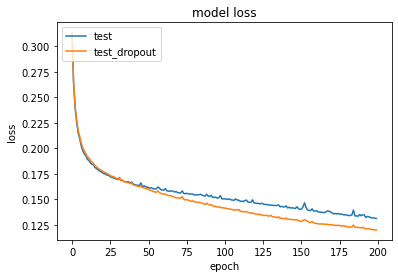

In [ ]:
# summarize history for loss
plt.plot(history_1.history['val_loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'test_dropout'], loc='upper left')
plt.show()

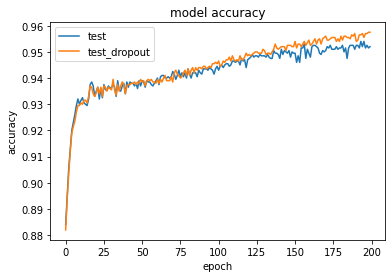

In [ ]:
# summarize history for loss
plt.plot(history_1.history['val_accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'test_dropout'], loc='upper left')
plt.show()

# Validation Set (The CORRECT way of training and evaluation process)

In [ ]:
#cross validation example
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=1, shuffle=True)

kfold = KFold(5, True, 2) # number of folds, shuffle, seed

# enumerate splits
for train, val in kfold.split(x_train_binary):
	print('train: %s, val: %s' % (train, val))

train: [    0     1     3 ... 11997 11998 11999], val: [    2     4    10 ... 11991 11992 11994]
train: [    0     1     2 ... 11997 11998 11999], val: [    3     5     6 ... 11988 11989 11993]
train: [    1     2     3 ... 11994 11995 11996], val: [    0    13    19 ... 11997 11998 11999]
train: [    0     1     2 ... 11997 11998 11999], val: [    7     9    21 ... 11948 11952 11955]
train: [    0     2     3 ... 11997 11998 11999], val: [    1    12    14 ... 11985 11995 11996]


In [ ]:
X_train_binary = x_train_binary[train]
Y_train_binary = y_train_binary[train]
X_val_binary = x_train_binary[val]
Y_val_binary = y_train_binary[val]

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint #save the model version that achieved lower loss!

seed = 2
tf.random.set_seed(seed)
np.random.seed(seed)

model = Sequential()
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))

batch_size = 128
epochs = 200

# save best model version
save_model = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=2)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history_3 = model.fit(X_train_binary, Y_train_binary, batch_size=batch_size, epochs=epochs, callbacks=[save_model],
          validation_data=(X_val_binary, Y_val_binary))

Epoch 1/200
75/75 [==============================] - 1s 6ms/step - loss: 0.3040 - accuracy: 0.8679 - val_loss: 0.1889 - val_accuracy: 0.9250

Epoch 00001: val_loss improved from inf to 0.18887, saving model to best_model.h5
Epoch 2/200
75/75 [==============================] - 0s 4ms/step - loss: 0.1746 - accuracy: 0.9282 - val_loss: 0.1643 - val_accuracy: 0.9383

Epoch 00002: val_loss improved from 0.18887 to 0.16427, saving model to best_model.h5
Epoch 3/200
75/75 [==============================] - 0s 4ms/step - loss: 0.1543 - accuracy: 0.9432 - val_loss: 0.1463 - val_accuracy: 0.9425

Epoch 00003: val_loss improved from 0.16427 to 0.14632, saving model to best_model.h5
Epoch 4/200
75/75 [==============================] - 0s 4ms/step - loss: 0.1309 - accuracy: 0.9533 - val_loss: 0.1380 - val_accuracy: 0.9467

Epoch 00004: val_loss improved from 0.14632 to 0.13803, saving model to best_model.h5
Epoch 5/200
75/75 [==============================] - 0s 4ms/step - loss: 0.1193 - accuracy: 

In [ ]:
np.mean(np.round(history_3.model.predict(x_test_binary))==y_test_binary.reshape(-1,1))

0.9615

In [ ]:
# load best val model to compute test accuracy
history_3.model.load_weights('best_model.h5')
np.mean(np.round(history_3.model.predict(x_test_binary))==y_test_binary.reshape(-1,1))

0.963

#Automatic hyperparameter search platform -> wandb sweeps
It is a nice way to keep track of the best hyperparams otherwise you have to do it manually using for loops for every hyperparameter.

In case you want to use it you have to create a account in https://wandb.ai/

example_1: https://colab.research.google.com/github/wandb/examples/blob/master/colabs/pytorch/Organizing_Hyperparameter_Sweeps_in_PyTorch_with_W%26B.ipynb

example_2: https://colab.research.google.com/drive/181GCGp36_75C2zm7WLxr9U2QjMXXoibt

TO DO:
Using grid search and x[:10000] as val set, so x[10000:] as training execute a dummy hyperparameter on the multiclass classification task (not binary).
Search for 100 epochs:
1. layers: [64, 96, 128]
2. learning rate: [0.001, 0.003, 0.005]
3. dropout: [0.3, 0.4, 0.5]
4. minimize loss

In [ ]:
# WandB – Install the W&B library
%pip install wandb -q
import wandb
from wandb.keras import WandbCallback

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline

!pip install wandb -qq
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.callbacks import Callback, ModelCheckpoint,EarlyStopping

!wandb login --relogin
wandb.login() #just click the link and copy paste the pass

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: Currently logged in as: pkasnesis (use `wandb login --relogin` to force relogin)


True

In [ ]:
sweep_config = {
    'method': ...
    }

In [ ]:
metric = {
    'name': ...,
    'goal': ...   
    }

sweep_config['metric'] = metric

In [ ]:
parameters_dict = {
....
    }

sweep_config['parameters'] = parameters_dict

In [ ]:
parameters_dict.update({
    'epochs': {
        'value': 100}
    })

In [ ]:
# use your username in entity
sweep_id = wandb.sweep(sweep_config, entity=None, project="aidl-a02-week5")

Create sweep with ID: xyurk3go
Sweep URL: https://wandb.ai/pkasnesis/aidl-a02-week5/sweeps/xyurk3go


In [ ]:
X_val = None
X_train = None
X_test = x_test

Y_train = tf.keras.utils.to_categorical(None,10)
Y_val = tf.keras.utils.to_categorical(None,10)
Y_test = tf.keras.utils.to_categorical(y_test,10)

In [ ]:
# The sweep calls this function with each set of hyperparameters
def train():
    # Default values for hyper-parameters we're going to sweep over
    config_defaults = {
        ...
    }

    # Initialize a new wandb run
    wandb.init(config=config_defaults)
    
    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    
    # Define the model architecture
    model = Sequential()
    model.add(Dense(None, activation="relu", input_shape=(x_train.shape[1],)))
    model.add(Dropout(None))
    model.add(Dense(10, activation="softmax"))

    batch_size = 128

    #save_model = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=2)
    adam = tf.keras.optimizers.Adam(lr=None)

    model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
    model.fit(X_train, Y_train, batch_size=batch_size,
              epochs=config.epochs,
              validation_data=(X_val, Y_val),
              callbacks=[WandbCallback(validation_data=(X_val, Y_val), labels=classes),
                          ])


In [ ]:
wandb.agent(sweep_id, train)

wandb: Agent Starting Run: e3pjngfv with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 100
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.001


Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 0.8831 - accuracy: 0.6921 - val_loss: 0.4508 - val_accuracy: 0.8392
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 0.4649 - accuracy: 0.8363 - val_loss: 0.4044 - val_accuracy: 0.8537
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 0.4157 - accuracy: 0.8517 - val_loss: 0.3757 - val_accuracy: 0.8628
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3853 - accuracy: 0.8592 - val_loss: 0.3541 - val_accuracy: 0.8699
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3694 - accuracy: 0.8673 - val_loss: 0.3446 - val_accuracy: 0.8727
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3536 - accuracy: 0.8719 - val_loss: 0.3317 - val_accuracy: 0.8779
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3358 - accuracy: 0.8787 - val_loss: 0.3394 - val_accuracy: 0.8729

epoch,99
loss,0.14904
accuracy,0.9427
val_loss,0.38046
val_accuracy,0.8959
_runtime,171
_timestamp,1620210358
_step,99
best_val_loss,0.28973
best_epoch,20


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████
val_loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▄▃▄▄▄▄▄▅▄▄▄▅▅
val_accuracy,▁▄▆▆▆▇▇▇█▇▇▇▇██▇█▇▇███▇▇██▇▇██▇███████▇█
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: 0456yku7 with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 100
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.003


Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 0.8861 - accuracy: 0.6966 - val_loss: 0.4521 - val_accuracy: 0.8415
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 0.4647 - accuracy: 0.8373 - val_loss: 0.3980 - val_accuracy: 0.8568
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 0.4116 - accuracy: 0.8529 - val_loss: 0.3644 - val_accuracy: 0.8687
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3914 - accuracy: 0.8567 - val_loss: 0.3593 - val_accuracy: 0.8693
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3670 - accuracy: 0.8643 - val_loss: 0.3463 - val_accuracy: 0.8743
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3480 - accuracy: 0.8745 - val_loss: 0.3363 - val_accuracy: 0.8781
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3357 - accuracy: 0.8804 - val_loss: 0.3297 - val_accuracy: 0.8792

epoch,99
loss,0.14244
accuracy,0.9445
val_loss,0.37137
val_accuracy,0.8968
_runtime,173
_timestamp,1620210538
_step,99
best_val_loss,0.29132
best_epoch,19


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████████████
val_loss,█▄▃▃▂▁▁▂▁▁▁▁▂▁▂▂▁▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▅▄▄
val_accuracy,▁▄▅▅▆▇▇▇█▇▇▇▇█▇▇███▇█▇█▇██▇▇████▇██▇█▇██
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: 6996bx2m with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 100
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.005


Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 0.8720 - accuracy: 0.6975 - val_loss: 0.4419 - val_accuracy: 0.8454
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 0.4675 - accuracy: 0.8372 - val_loss: 0.3965 - val_accuracy: 0.8560
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 0.4110 - accuracy: 0.8553 - val_loss: 0.3711 - val_accuracy: 0.8687
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3858 - accuracy: 0.8632 - val_loss: 0.3708 - val_accuracy: 0.8641
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3686 - accuracy: 0.8665 - val_loss: 0.3506 - val_accuracy: 0.8708
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3500 - accuracy: 0.8724 - val_loss: 0.3349 - val_accuracy: 0.8809
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3356 - accuracy: 0.8766 - val_loss: 0.3286 - val_accuracy: 0.8837

epoch,99
loss,0.14329
accuracy,0.94516
val_loss,0.37853
val_accuracy,0.8982
_runtime,177
_timestamp,1620210721
_step,99
best_val_loss,0.29314
best_epoch,22


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████
val_loss,█▅▃▂▂▂▂▂▁▁▂▁▁▁▂▂▂▂▂▂▃▂▂▂▂▃▃▄▄▄▃▄▄▄▄▅▅▅▅▅
val_accuracy,▁▄▅▆▆▆▆▇▇▇▆▇▇▇▇▇▇▇▇█▇█▇▇█▇▇▇▇▇▇▇▇▇▇▇▇█▇█
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: 0udu0dh5 with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 100
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.001


Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 0.8057 - accuracy: 0.7208 - val_loss: 0.4236 - val_accuracy: 0.8519
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4300 - accuracy: 0.8447 - val_loss: 0.3792 - val_accuracy: 0.8644
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3879 - accuracy: 0.8594 - val_loss: 0.3650 - val_accuracy: 0.8647
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3703 - accuracy: 0.8643 - val_loss: 0.3411 - val_accuracy: 0.8764
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3474 - accuracy: 0.8730 - val_loss: 0.3399 - val_accuracy: 0.8768
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3294 - accuracy: 0.8810 - val_loss: 0.3198 - val_accuracy: 0.8801
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3115 - accuracy: 0.8871 - val_loss: 0.3160 - val_accuracy: 0.8836

epoch,99
loss,0.10241
accuracy,0.96028
val_loss,0.4109
val_accuracy,0.9014
_runtime,178
_timestamp,1620210906
_step,99
best_val_loss,0.28619
best_epoch,28


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████
val_loss,█▅▃▂▁▁▂▂▁▁▁▁▁▂▁▂▂▁▃▃▃▂▃▃▄▄▄▄▄▄▄▄▅▄▅▅▆▆▇▇
val_accuracy,▁▃▅▆▆▇▆▇▇▇▇▇█▇▇███▇████▇█▇█▇▇███▇███▇█▇█
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: td12kf0e with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 100
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.003


Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 0.8040 - accuracy: 0.7173 - val_loss: 0.4511 - val_accuracy: 0.8414
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 0.4414 - accuracy: 0.8431 - val_loss: 0.3815 - val_accuracy: 0.8631
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3908 - accuracy: 0.8590 - val_loss: 0.3572 - val_accuracy: 0.8728
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3588 - accuracy: 0.8720 - val_loss: 0.3415 - val_accuracy: 0.8728
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3464 - accuracy: 0.8755 - val_loss: 0.3304 - val_accuracy: 0.8765
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3302 - accuracy: 0.8791 - val_loss: 0.3362 - val_accuracy: 0.8784
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3181 - accuracy: 0.8810 - val_loss: 0.3108 - val_accuracy: 0.8875

epoch,99
loss,0.10415
accuracy,0.9601
val_loss,0.40521
val_accuracy,0.8984
_runtime,179
_timestamp,1620211092
_step,99
best_val_loss,0.28035
best_epoch,22


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████
val_loss,█▄▃▂▂▂▂▂▁▁▁▂▂▂▂▂▂▂▃▃▃▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▇▆▆▆
val_accuracy,▁▅▅▆▇▇▇▆▇▇▇▇▇▇██▇█▇████████████▇█▇██▇███
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: kxtniz9g with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 100
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.005


Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 0.7873 - accuracy: 0.7243 - val_loss: 0.4270 - val_accuracy: 0.8513
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4359 - accuracy: 0.8462 - val_loss: 0.3696 - val_accuracy: 0.8683
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3836 - accuracy: 0.8638 - val_loss: 0.3515 - val_accuracy: 0.8738
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3582 - accuracy: 0.8697 - val_loss: 0.3564 - val_accuracy: 0.8679
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3488 - accuracy: 0.8708 - val_loss: 0.3270 - val_accuracy: 0.8786
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3234 - accuracy: 0.8810 - val_loss: 0.3195 - val_accuracy: 0.8862
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 0.3130 - accuracy: 0.8866 - val_loss: 0.3542 - val_accuracy: 0.8640

epoch,99
loss,0.10729
accuracy,0.95888
val_loss,0.40147
val_accuracy,0.8976
_runtime,179
_timestamp,1620211278
_step,99
best_val_loss,0.28491
best_epoch,24


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇███████████████
val_loss,█▄▂▂▂▂▁▁▁▁▁▁▁▂▁▂▂▂▂▂▂▃▃▃▄▄▃▄▄▅▅▅▆▅▅▆▆▆▆▇
val_accuracy,▁▄▆▆▆▆▆▇▇▇▇██▇█▇██▇████▇▇█▇████████▇██▇▇
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: n3jbw0oq with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 100
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.001


Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 0.7281 - accuracy: 0.7445 - val_loss: 0.4097 - val_accuracy: 0.8550
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4184 - accuracy: 0.8498 - val_loss: 0.3858 - val_accuracy: 0.8592
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3761 - accuracy: 0.8632 - val_loss: 0.3595 - val_accuracy: 0.8720
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3483 - accuracy: 0.8723 - val_loss: 0.3513 - val_accuracy: 0.8723
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3353 - accuracy: 0.8770 - val_loss: 0.3322 - val_accuracy: 0.8756
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3205 - accuracy: 0.8836 - val_loss: 0.3209 - val_accuracy: 0.8805
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.2994 - accuracy: 0.8892 - val_loss: 0.3101 - val_accuracy: 0.8870

epoch,99
loss,0.08723
accuracy,0.9665
val_loss,0.4199
val_accuracy,0.9022
_runtime,189
_timestamp,1620211474
_step,99
best_val_loss,0.2795
best_epoch,22


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████
val_loss,▇▅▃▂▂▁▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▇▆▇▇▇█▇
val_accuracy,▁▃▄▆▆▆▆▇▇▇▇▇▇▇▇▇▇█▇▇██▇█▇▇▇█▇██▇█▇█▇█▇▇▇
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: vccggk1v with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 100
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.003


Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 0.7344 - accuracy: 0.7438 - val_loss: 0.4354 - val_accuracy: 0.8425
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4216 - accuracy: 0.8481 - val_loss: 0.3748 - val_accuracy: 0.8645
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3761 - accuracy: 0.8614 - val_loss: 0.3517 - val_accuracy: 0.8732
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3449 - accuracy: 0.8746 - val_loss: 0.3593 - val_accuracy: 0.8669
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3332 - accuracy: 0.8784 - val_loss: 0.3344 - val_accuracy: 0.8804
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3188 - accuracy: 0.8822 - val_loss: 0.3191 - val_accuracy: 0.8821
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3109 - accuracy: 0.8874 - val_loss: 0.3191 - val_accuracy: 0.8852

epoch,99
loss,0.085
accuracy,0.9675
val_loss,0.41463
val_accuracy,0.9048
_runtime,189
_timestamp,1620211670
_step,99
best_val_loss,0.28008
best_epoch,17


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████
val_loss,█▄▃▂▂▁▁▁▁▁▁▁▁▁▂▃▃▂▂▃▄▃▃▄▄▄▄▄▄▅▆▅▆▅▇▆▆▇▇▇
val_accuracy,▁▄▅▆▇▇▇▇▇▇█▇██▇▇▇▇▇▇▇▇▇▇█▇████▇█▇█▇██▇▇█
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: zr6tx6vr with config:
wandb: 	dropout: 0.3
wandb: 	epochs: 100
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.005


Epoch 1/100
391/391 [==============================] - 3s 5ms/step - loss: 0.7217 - accuracy: 0.7470 - val_loss: 0.4138 - val_accuracy: 0.8501
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4209 - accuracy: 0.8504 - val_loss: 0.3868 - val_accuracy: 0.8599
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3730 - accuracy: 0.8657 - val_loss: 0.3547 - val_accuracy: 0.8708
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3509 - accuracy: 0.8735 - val_loss: 0.3352 - val_accuracy: 0.8791
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3265 - accuracy: 0.8816 - val_loss: 0.3270 - val_accuracy: 0.8800
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3214 - accuracy: 0.8837 - val_loss: 0.3074 - val_accuracy: 0.8894
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3039 - accuracy: 0.8891 - val_loss: 0.3052 - val_accuracy: 0.8905

epoch,99
loss,0.0864
accuracy,0.96566
val_loss,0.43349
val_accuracy,0.9012
_runtime,197
_timestamp,1620211874
_step,99
best_val_loss,0.2839
best_epoch,20


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇███████████████
val_loss,▇▄▂▂▂▂▁▁▁▁▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▆▆▆▇▆▇▇█▇█
val_accuracy,▁▄▆▆▆▆▇▇▇▇█▇██▇▇███▇█▇█▇█▇█▇███▇██▇██▇██
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: 03he7lme with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 100
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.001


Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 0.9029 - accuracy: 0.6890 - val_loss: 0.4529 - val_accuracy: 0.8419
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4962 - accuracy: 0.8260 - val_loss: 0.4046 - val_accuracy: 0.8501
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4352 - accuracy: 0.8436 - val_loss: 0.3884 - val_accuracy: 0.8626
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4060 - accuracy: 0.8527 - val_loss: 0.3599 - val_accuracy: 0.8718
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3849 - accuracy: 0.8611 - val_loss: 0.3473 - val_accuracy: 0.8754
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3724 - accuracy: 0.8644 - val_loss: 0.3458 - val_accuracy: 0.8726
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3635 - accuracy: 0.8684 - val_loss: 0.3346 - val_accuracy: 0.8779

epoch,99
loss,0.18272
accuracy,0.92792
val_loss,0.36133
val_accuracy,0.8962
_runtime,190
_timestamp,1620212071
_step,99
best_val_loss,0.29747
best_epoch,30


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▆▆▆▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇█▇███████████████
val_loss,█▅▃▂▂▂▂▂▁▂▁▂▁▂▁▁▁▁▂▂▂▂▂▂▂▃▂▂▃▂▄▃▃▃▃▃▄▃▄▄
val_accuracy,▁▄▅▆▇▇▇▆▇▇█▇█▇▇▇██▇███▇███▇███████▇█▇█▇█
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: u3cpt7d8 with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 100
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.003


Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 0.9120 - accuracy: 0.6831 - val_loss: 0.4734 - val_accuracy: 0.8304
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4878 - accuracy: 0.8288 - val_loss: 0.4148 - val_accuracy: 0.8500
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4257 - accuracy: 0.8507 - val_loss: 0.3722 - val_accuracy: 0.8687
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4060 - accuracy: 0.8554 - val_loss: 0.3724 - val_accuracy: 0.8614
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3879 - accuracy: 0.8595 - val_loss: 0.3548 - val_accuracy: 0.8759
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3688 - accuracy: 0.8708 - val_loss: 0.3401 - val_accuracy: 0.8761
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3648 - accuracy: 0.8690 - val_loss: 0.3333 - val_accuracy: 0.8794

epoch,99
loss,0.1746
accuracy,0.93306
val_loss,0.37192
val_accuracy,0.8947
_runtime,189
_timestamp,1620212267
_step,99
best_val_loss,0.29911
best_epoch,23


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████████████
val_loss,█▄▃▂▂▂▁▁▂▁▁▁▁▁▂▁▂▂▁▂▂▂▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄
val_accuracy,▁▅▆▆▇▇▇▇▇▇▇▇████▇▇█▇▇█▇█████████▇▇▇██▇▇█
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: w9vjw7z5 with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 100
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.005


Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 0.9243 - accuracy: 0.6805 - val_loss: 0.4567 - val_accuracy: 0.8401
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4819 - accuracy: 0.8304 - val_loss: 0.4100 - val_accuracy: 0.8607
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4388 - accuracy: 0.8458 - val_loss: 0.3815 - val_accuracy: 0.8617
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3995 - accuracy: 0.8564 - val_loss: 0.3619 - val_accuracy: 0.8682
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3927 - accuracy: 0.8587 - val_loss: 0.3435 - val_accuracy: 0.8743
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3732 - accuracy: 0.8659 - val_loss: 0.3424 - val_accuracy: 0.8760
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3668 - accuracy: 0.8652 - val_loss: 0.3380 - val_accuracy: 0.8784

epoch,99
loss,0.1851
accuracy,0.9284
val_loss,0.37251
val_accuracy,0.891
_runtime,192
_timestamp,1620212467
_step,99
best_val_loss,0.29993
best_epoch,20


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████████████
val_loss,█▅▃▃▂▂▂▂▁▁▂▁▂▁▂▁▁▂▁▂▂▂▂▃▂▃▃▃▂▃▃▃▃▃▃▄▃▄▃▄
val_accuracy,▁▄▅▅▆▆▇▇█▇▇▇▇▇▇█▇██████▇█▇▇████████▇▇██▇
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: gx8w8ksl with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 100
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.001


Epoch 1/100
391/391 [==============================] - 3s 5ms/step - loss: 0.8092 - accuracy: 0.7199 - val_loss: 0.4440 - val_accuracy: 0.8420
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4579 - accuracy: 0.8387 - val_loss: 0.3891 - val_accuracy: 0.8594
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4137 - accuracy: 0.8479 - val_loss: 0.3694 - val_accuracy: 0.8616
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3759 - accuracy: 0.8604 - val_loss: 0.3415 - val_accuracy: 0.8748
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3693 - accuracy: 0.8676 - val_loss: 0.3391 - val_accuracy: 0.8762
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3447 - accuracy: 0.8746 - val_loss: 0.3393 - val_accuracy: 0.8748
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3391 - accuracy: 0.8792 - val_loss: 0.3295 - val_accuracy: 0.8792

epoch,99
loss,0.13505
accuracy,0.94746
val_loss,0.38072
val_accuracy,0.8977
_runtime,194
_timestamp,1620212668
_step,99
best_val_loss,0.28762
best_epoch,25


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████
val_loss,█▅▃▃▂▂▁▂▂▂▁▁▁▁▂▁▂▂▂▂▂▂▂▃▂▃▂▃▃▃▃▄▃▄▄▄▄▄▅▅
val_accuracy,▁▃▅▅▆▇▇▇▇▇██▇▇██▇▇▇█▇██████████▇████████
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: uoh82fai with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 100
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.003


Epoch 1/100
391/391 [==============================] - 3s 5ms/step - loss: 0.8260 - accuracy: 0.7157 - val_loss: 0.4442 - val_accuracy: 0.8435
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4515 - accuracy: 0.8403 - val_loss: 0.3807 - val_accuracy: 0.8650
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3996 - accuracy: 0.8580 - val_loss: 0.3605 - val_accuracy: 0.8665
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3816 - accuracy: 0.8634 - val_loss: 0.3602 - val_accuracy: 0.8694
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3579 - accuracy: 0.8737 - val_loss: 0.3328 - val_accuracy: 0.8809
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3508 - accuracy: 0.8702 - val_loss: 0.3290 - val_accuracy: 0.8799
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3445 - accuracy: 0.8760 - val_loss: 0.3254 - val_accuracy: 0.8841

epoch,99
loss,0.13814
accuracy,0.94684
val_loss,0.37391
val_accuracy,0.8994
_runtime,194
_timestamp,1620212870
_step,99
best_val_loss,0.28609
best_epoch,22


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████
val_loss,█▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▃▂▃▄▃▃▄▃▄▄▄▄▄▄▄▅
val_accuracy,▁▄▅▅▆▆▇▇▇▇▇▇▇▇▇████▇███████▇█▇██▇▇████▇█
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: vzcny6me with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 100
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.005


Epoch 1/100
391/391 [==============================] - 3s 6ms/step - loss: 0.8245 - accuracy: 0.7157 - val_loss: 0.4446 - val_accuracy: 0.8426
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4512 - accuracy: 0.8417 - val_loss: 0.3868 - val_accuracy: 0.8621
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4016 - accuracy: 0.8554 - val_loss: 0.3613 - val_accuracy: 0.8724
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3749 - accuracy: 0.8645 - val_loss: 0.3442 - val_accuracy: 0.8779
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3633 - accuracy: 0.8673 - val_loss: 0.3346 - val_accuracy: 0.8797
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3418 - accuracy: 0.8755 - val_loss: 0.3194 - val_accuracy: 0.8832
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3277 - accuracy: 0.8812 - val_loss: 0.3243 - val_accuracy: 0.8781

epoch,99
loss,0.13364
accuracy,0.94816
val_loss,0.3916
val_accuracy,0.9002
_runtime,198
_timestamp,1620213076
_step,99
best_val_loss,0.28719
best_epoch,22


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████
val_loss,█▄▂▂▂▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▃▂▂▃▃▄▃▃▄▄▄▅▅▅▄▅▅▆
val_accuracy,▁▄▆▆▇▇▇▇▇▇▇▇▇███▇██▇▇█████████▇█████████
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: 82tpzuwq with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 100
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.001


Epoch 1/100
391/391 [==============================] - 3s 6ms/step - loss: 0.7355 - accuracy: 0.7433 - val_loss: 0.4129 - val_accuracy: 0.8536
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4254 - accuracy: 0.8489 - val_loss: 0.3747 - val_accuracy: 0.8673
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3871 - accuracy: 0.8601 - val_loss: 0.3539 - val_accuracy: 0.8714
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3667 - accuracy: 0.8671 - val_loss: 0.3417 - val_accuracy: 0.8735
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3460 - accuracy: 0.8733 - val_loss: 0.3277 - val_accuracy: 0.8812
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3291 - accuracy: 0.8801 - val_loss: 0.3167 - val_accuracy: 0.8841
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3176 - accuracy: 0.8845 - val_loss: 0.3252 - val_accuracy: 0.8822

epoch,99
loss,0.11177
accuracy,0.95712
val_loss,0.38301
val_accuracy,0.9047
_runtime,207
_timestamp,1620213292
_step,99
best_val_loss,0.28081
best_epoch,24


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████
val_loss,█▅▃▃▂▂▂▁▁▂▁▁▂▂▁▂▂▂▂▂▃▂▃▃▃▃▃▄▅▅▄▄▄▄▅▆▅▅▆▆
val_accuracy,▁▃▅▅▆▆▆▇▇▆▇▇▆▇▇█▇▇██▇█▇▇▇▇▇█▇▇████████▇█
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: a3hgw5ug with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 100
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.003


Epoch 1/100
391/391 [==============================] - 3s 6ms/step - loss: 0.7413 - accuracy: 0.7398 - val_loss: 0.4078 - val_accuracy: 0.8557
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4327 - accuracy: 0.8436 - val_loss: 0.3640 - val_accuracy: 0.8682
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3807 - accuracy: 0.8628 - val_loss: 0.3532 - val_accuracy: 0.8728
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3644 - accuracy: 0.8697 - val_loss: 0.3453 - val_accuracy: 0.8750
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3442 - accuracy: 0.8744 - val_loss: 0.3316 - val_accuracy: 0.8793
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3360 - accuracy: 0.8772 - val_loss: 0.3145 - val_accuracy: 0.8863
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3179 - accuracy: 0.8837 - val_loss: 0.3178 - val_accuracy: 0.8840

epoch,99
loss,0.1111
accuracy,0.95692
val_loss,0.38733
val_accuracy,0.9058
_runtime,205
_timestamp,1620213506
_step,99
best_val_loss,0.28027
best_epoch,24


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████
val_loss,█▅▃▃▂▁▃▁▁▁▁▁▁▂▁▃▂▂▂▂▃▃▃▃▄▄▄▄▄▄▄▅▆▅▆▆▅▆▅▇
val_accuracy,▁▃▅▄▆▇▅▆▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇▇█▇████▇▇███████
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: vhgd5cs1 with config:
wandb: 	dropout: 0.4
wandb: 	epochs: 100
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.005


Epoch 1/100
391/391 [==============================] - 3s 6ms/step - loss: 0.7318 - accuracy: 0.7459 - val_loss: 0.4317 - val_accuracy: 0.8447
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4271 - accuracy: 0.8481 - val_loss: 0.3698 - val_accuracy: 0.8670
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3883 - accuracy: 0.8596 - val_loss: 0.3470 - val_accuracy: 0.8763
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3570 - accuracy: 0.8691 - val_loss: 0.3429 - val_accuracy: 0.8704
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3488 - accuracy: 0.8735 - val_loss: 0.3291 - val_accuracy: 0.8799
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3285 - accuracy: 0.8803 - val_loss: 0.3239 - val_accuracy: 0.8816
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3220 - accuracy: 0.8811 - val_loss: 0.3192 - val_accuracy: 0.8846

epoch,99
loss,0.11003
accuracy,0.95748
val_loss,0.39261
val_accuracy,0.9
_runtime,205
_timestamp,1620213720
_step,99
best_val_loss,0.28261
best_epoch,31


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████████
val_loss,█▄▃▂▂▂▁▁▁▁▁▁▂▂▁▂▂▂▂▂▃▃▂▃▂▃▃▃▄▄▄▄▄▅▅▄▆▅▅▆
val_accuracy,▁▅▅▆▆▇▇▇▇▇▇▇▇▇█▇█▇██▇███████████████▇███
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: jojc7g6d with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 100
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.001


Epoch 1/100
391/391 [==============================] - 3s 5ms/step - loss: 0.9574 - accuracy: 0.6738 - val_loss: 0.4768 - val_accuracy: 0.8286
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.5172 - accuracy: 0.8184 - val_loss: 0.4241 - val_accuracy: 0.8478
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4690 - accuracy: 0.8349 - val_loss: 0.3810 - val_accuracy: 0.8654
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4324 - accuracy: 0.8456 - val_loss: 0.3733 - val_accuracy: 0.8669
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4125 - accuracy: 0.8522 - val_loss: 0.3531 - val_accuracy: 0.8740
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4007 - accuracy: 0.8564 - val_loss: 0.3466 - val_accuracy: 0.8750
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3842 - accuracy: 0.8610 - val_loss: 0.3423 - val_accuracy: 0.8766

epoch,99
loss,0.22464
accuracy,0.91366
val_loss,0.34199
val_accuracy,0.8911
_runtime,196
_timestamp,1620213925
_step,99
best_val_loss,0.30333
best_epoch,42


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████████████
val_loss,█▄▃▃▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▁▁▂▂▁▂▂▂▂▂▂▂▃▂▂
val_accuracy,▁▅▆▅▆▆▇▇▇▇▇▇▇▇█▇██████▇▇████████████████
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: q12xy79j with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 100
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.003


Epoch 1/100
391/391 [==============================] - 3s 5ms/step - loss: 0.9515 - accuracy: 0.6666 - val_loss: 0.4709 - val_accuracy: 0.8342
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.5145 - accuracy: 0.8200 - val_loss: 0.4115 - val_accuracy: 0.8518
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4586 - accuracy: 0.8355 - val_loss: 0.3978 - val_accuracy: 0.8505
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4288 - accuracy: 0.8478 - val_loss: 0.3686 - val_accuracy: 0.8683
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4039 - accuracy: 0.8537 - val_loss: 0.3596 - val_accuracy: 0.8695
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3978 - accuracy: 0.8564 - val_loss: 0.3528 - val_accuracy: 0.8723
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3966 - accuracy: 0.8575 - val_loss: 0.3552 - val_accuracy: 0.8679

epoch,99
loss,0.22347
accuracy,0.91302
val_loss,0.3456
val_accuracy,0.8928
_runtime,196
_timestamp,1620214129
_step,99
best_val_loss,0.30538
best_epoch,30


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇███████████████
val_loss,█▅▃▃▂▂▂▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▂▁▁▂▂▂▂▂▂▂▂▂▃▃▃▃▃▃
val_accuracy,▁▃▅▅▆▆▇▇▇▇▇▆▇▇▇██████▇█████████████▇████
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: l1j1hwq3 with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 100
wandb: 	fc_layer_size: 128
wandb: 	learning-rate: 0.005


Epoch 1/100
391/391 [==============================] - 3s 5ms/step - loss: 0.9679 - accuracy: 0.6704 - val_loss: 0.4584 - val_accuracy: 0.8416
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.5191 - accuracy: 0.8199 - val_loss: 0.4128 - val_accuracy: 0.8547
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4580 - accuracy: 0.8394 - val_loss: 0.3809 - val_accuracy: 0.8621
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4388 - accuracy: 0.8443 - val_loss: 0.3654 - val_accuracy: 0.8673
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4088 - accuracy: 0.8538 - val_loss: 0.3692 - val_accuracy: 0.8632
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4012 - accuracy: 0.8547 - val_loss: 0.3575 - val_accuracy: 0.8679
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3867 - accuracy: 0.8610 - val_loss: 0.3421 - val_accuracy: 0.8744

epoch,99
loss,0.22212
accuracy,0.91226
val_loss,0.33363
val_accuracy,0.8954
_runtime,201
_timestamp,1620214339
_step,99
best_val_loss,0.30365
best_epoch,35


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████████
val_loss,█▄▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▂▁▁▂▂▁▂▂▂▂▂▂▂▂▂▃▃▂▂▂
val_accuracy,▁▄▄▆▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇█▇█▇███▇▇▇███
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: csmh4u9v with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 100
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.001


Epoch 1/100
391/391 [==============================] - 3s 6ms/step - loss: 0.8697 - accuracy: 0.6932 - val_loss: 0.4538 - val_accuracy: 0.8348
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4744 - accuracy: 0.8305 - val_loss: 0.3967 - val_accuracy: 0.8549
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4303 - accuracy: 0.8448 - val_loss: 0.3676 - val_accuracy: 0.8687
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3977 - accuracy: 0.8567 - val_loss: 0.3552 - val_accuracy: 0.8720
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3713 - accuracy: 0.8661 - val_loss: 0.3571 - val_accuracy: 0.8698
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3688 - accuracy: 0.8656 - val_loss: 0.3360 - val_accuracy: 0.8785
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3539 - accuracy: 0.8697 - val_loss: 0.3320 - val_accuracy: 0.8796

epoch,99
loss,0.17114
accuracy,0.93478
val_loss,0.36198
val_accuracy,0.8981
_runtime,206
_timestamp,1620214553
_step,99
best_val_loss,0.2917
best_epoch,21


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████
val_loss,█▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▂▂▂▂▃▂▂▂▃▃▃▃▃▃▃▃▃▄
val_accuracy,▁▅▆▆▇▆▇▇▇▇▇▇█▇█▇▇████████▇█████▇████████
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: qlnvhest with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 100
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.003


Epoch 1/100
391/391 [==============================] - 3s 6ms/step - loss: 0.8688 - accuracy: 0.6935 - val_loss: 0.4514 - val_accuracy: 0.8418
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4712 - accuracy: 0.8312 - val_loss: 0.3874 - val_accuracy: 0.8629
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4194 - accuracy: 0.8483 - val_loss: 0.3713 - val_accuracy: 0.8645
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3986 - accuracy: 0.8559 - val_loss: 0.3472 - val_accuracy: 0.8739
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3827 - accuracy: 0.8623 - val_loss: 0.3401 - val_accuracy: 0.8754
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3633 - accuracy: 0.8709 - val_loss: 0.3433 - val_accuracy: 0.8776
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3569 - accuracy: 0.8705 - val_loss: 0.3298 - val_accuracy: 0.8816

epoch,99
loss,0.16764
accuracy,0.93548
val_loss,0.34349
val_accuracy,0.9006
_runtime,206
_timestamp,1620214767
_step,99
best_val_loss,0.29013
best_epoch,30


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████
val_loss,█▅▃▃▂▂▁▂▁▁▁▂▁▁▁▁▂▁▁▂▁▁▁▂▂▃▂▂▂▂▂▃▂▃▃▃▃▃▃▃
val_accuracy,▁▄▅▅▆▆▇▇▇▇▇▇▇▇▇████▇█████▇███▇▇██▇█▇████
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: 3ilbmpdj with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 100
wandb: 	fc_layer_size: 256
wandb: 	learning-rate: 0.005


Epoch 1/100
391/391 [==============================] - 3s 6ms/step - loss: 0.8408 - accuracy: 0.7059 - val_loss: 0.4449 - val_accuracy: 0.8425
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4708 - accuracy: 0.8319 - val_loss: 0.3997 - val_accuracy: 0.8559
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4294 - accuracy: 0.8464 - val_loss: 0.3700 - val_accuracy: 0.8668
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3992 - accuracy: 0.8551 - val_loss: 0.3476 - val_accuracy: 0.8751
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3839 - accuracy: 0.8600 - val_loss: 0.3477 - val_accuracy: 0.8705
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3690 - accuracy: 0.8643 - val_loss: 0.3405 - val_accuracy: 0.8762
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3563 - accuracy: 0.8702 - val_loss: 0.3286 - val_accuracy: 0.8798

epoch,99
loss,0.16939
accuracy,0.9349
val_loss,0.35061
val_accuracy,0.8988
_runtime,204
_timestamp,1620214980
_step,99
best_val_loss,0.28683
best_epoch,31


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████
val_loss,█▅▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▁▂▂▂▃▃▃▂▃▃▃▃▃▄▃▄▄
val_accuracy,▁▄▅▅▆▆▇▇▇▇▇▇▇▇▇▇▇█▇██▇▇▇▇▇████████████▇█
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: 7e0zatp3 with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 100
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.001


Epoch 1/100
391/391 [==============================] - 3s 6ms/step - loss: 0.7784 - accuracy: 0.7263 - val_loss: 0.4230 - val_accuracy: 0.8473
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4500 - accuracy: 0.8396 - val_loss: 0.3792 - val_accuracy: 0.8635
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4048 - accuracy: 0.8538 - val_loss: 0.3544 - val_accuracy: 0.8742
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3743 - accuracy: 0.8632 - val_loss: 0.3555 - val_accuracy: 0.8661
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3687 - accuracy: 0.8659 - val_loss: 0.3333 - val_accuracy: 0.8785
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3469 - accuracy: 0.8716 - val_loss: 0.3315 - val_accuracy: 0.8799
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3473 - accuracy: 0.8728 - val_loss: 0.3228 - val_accuracy: 0.8802

epoch,99
loss,0.14483
accuracy,0.94514
val_loss,0.35575
val_accuracy,0.903
_runtime,210
_timestamp,1620215200
_step,99
best_val_loss,0.28525
best_epoch,29


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████
val_loss,█▄▃▂▁▂▁▂▂▁▁▁▁▁▁▁▁▁▂▁▂▂▂▂▂▂▃▃▂▃▃▃▄▄▄▄▄▄▄▄
val_accuracy,▁▄▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇█▇█▇▇▇█████▇██████
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: szknbqe6 with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 100
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.003


Epoch 1/100
391/391 [==============================] - 3s 6ms/step - loss: 0.7695 - accuracy: 0.7297 - val_loss: 0.4282 - val_accuracy: 0.8462
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4446 - accuracy: 0.8418 - val_loss: 0.3991 - val_accuracy: 0.8537
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4054 - accuracy: 0.8537 - val_loss: 0.3640 - val_accuracy: 0.8691
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3791 - accuracy: 0.8619 - val_loss: 0.3464 - val_accuracy: 0.8739
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3598 - accuracy: 0.8689 - val_loss: 0.3312 - val_accuracy: 0.8801
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3514 - accuracy: 0.8700 - val_loss: 0.3243 - val_accuracy: 0.8813
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3357 - accuracy: 0.8769 - val_loss: 0.3184 - val_accuracy: 0.8832

epoch,99
loss,0.14123
accuracy,0.94418
val_loss,0.36382
val_accuracy,0.9003
_runtime,209
_timestamp,1620215419
_step,99
best_val_loss,0.28635
best_epoch,31


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████
val_loss,█▅▃▂▂▂▂▁▁▁▁▁▁▁▁▂▂▂▂▃▂▂▂▂▃▃▃▃▃▃▄▃▃▄▄▄▅▅▅▅
val_accuracy,▁▄▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇█▇██▇██▇███▇▇▇██▇
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Agent Starting Run: l2ylcagj with config:
wandb: 	dropout: 0.5
wandb: 	epochs: 100
wandb: 	fc_layer_size: 512
wandb: 	learning-rate: 0.005


Epoch 1/100
391/391 [==============================] - 3s 6ms/step - loss: 0.7784 - accuracy: 0.7267 - val_loss: 0.4437 - val_accuracy: 0.8420
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4514 - accuracy: 0.8371 - val_loss: 0.3767 - val_accuracy: 0.8640
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.4042 - accuracy: 0.8541 - val_loss: 0.3721 - val_accuracy: 0.8633
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3820 - accuracy: 0.8611 - val_loss: 0.3591 - val_accuracy: 0.8689
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3598 - accuracy: 0.8686 - val_loss: 0.3340 - val_accuracy: 0.8774
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3545 - accuracy: 0.8688 - val_loss: 0.3309 - val_accuracy: 0.8757
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.3391 - accuracy: 0.8722 - val_loss: 0.3198 - val_accuracy: 0.8796

epoch,99
loss,0.14122
accuracy,0.94506
val_loss,0.35415
val_accuracy,0.9044
_runtime,212
_timestamp,1620215641
_step,99
best_val_loss,0.27914
best_epoch,30


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████
val_loss,█▅▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▃▃▄▄▄▄
val_accuracy,▁▃▅▅▆▆▇▆▇▇▇▇▇▇██▇█▇▇▇▇▇█▇██████▇████▇█▇█
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [ ]:
# restore the model file "model.h5" from a specific run by user "pkasnesis"
# in project "aidl-a02-week5" from run "10pr4joa"
best_model = wandb.restore('model-best.h5', run_path="pkasnesis/aidl-a02-week5/l2ylcagj")# replace them using your account

model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(x_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

# use the "name" attribute of the returned object if your framework expects a filename, e.g. as in Keras
model.load_weights(best_model.name)

In [ ]:
# check if validation acc is the same
np.mean(model.predict_classes(X_val)==np.argmax(Y_val,1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9014

In [ ]:
# estimate test accuracy
np.mean(model.predict_classes(X_test)==np.argmax(Y_test,1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.89